In [ ]:
pip install yfinance --upgrade --no-cache-dir

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
f = open('madrid', "r") #r significa read

In [6]:
def getTicker(nombre):
    accion = yf.Ticker(nombre)
    if "currentPrice" in accion.info: #Solo se consideran válidas aquellas que tengan un valor actual
        return (nombre, accion.info["longName"], accion.info["currentPrice"], accion.history)
    else:
        return []

In [7]:
acciones = []
for l in f: #f variable que contiene lista de nombre de acciones doc madrid o ibex; l línea en la lista
    accion = getTicker(l.split()[0])
    if len(accion) != 0:
        acciones.append(accion)
acciones.sort(key=lambda x: x[2], reverse=True)

In [8]:
df_todos = pd.DataFrame(np.array(acciones)[:, :3], columns=['Acción', 'Nombre', 'Valor'])
df_todos

,Acción,Nombre,Valor
0,ANA.MC,"Acciona, S.A.",141
1,BDL.MC,"Barón de Ley, S.A.",113
2,CLNX.MC,"Cellnex Telecom, S.A.",57.2
3,FDR.MC,"Fluidra, S.A.",35.6
4,AIR,AAR Corp.,32.31
5,CIE.MC,"CIE Automotive, S.A.",21.92
6,ELE.MC,"Endesa, S.A.",18.04
7,EBRO.MC,"Ebro Foods, S.A.",16.34
8,FCC.MC,"Fomento de Construcciones y Contratas, S.A.",11.04
9,IBE.MC,"Iberdrola, S.A.",9.37


In [9]:
maximos = np.array(acciones[0:2])
minimos = np.array(acciones[-2:])
df = pd.DataFrame(np.concatenate((maximos[:, :3],minimos[:, :3]), axis=0),
                  columns=['Acción', 'Nombre', 'Valor'])
df

,Acción,Nombre,Valor
0,ANA.MC,"Acciona, S.A.",141
1,BDL.MC,"Barón de Ley, S.A.",113
2,MDF.MC,"Duro Felguera, S.A.",0.83
3,OLE.MC,"Deoleo, S.A.",0.3542


In [10]:
z = ['ANA.VI', 'LEY.F', 'DF5B.F', 'SC5A.F'] # mismo nombre de las que poseen mayor y menor valor, pero en otras bolsas
# ANA.VI acción de "Acciona, S.A." en Vienna
# LEY.F acción de "Barón de Ley, S.A." en Frankfurt
# DF5B.F acción de "Duro Felguera, S.A." en Frankfurt
# SC5A.F acción de "Deoleo, S.A." en Frankfurt

In [11]:
otras_acciones = []
for l in z: 
    accion = getTicker(l.split()[0])
    if len(accion) != 0:
        otras_acciones.append(accion)
otras_acciones.sort(key=lambda x: x[2], reverse=True)

In [12]:
df_otras = pd.DataFrame(np.array(otras_acciones)[:, :3], columns=['Acción', 'Nombre', 'Valor'])
df_otras

,Acción,Nombre,Valor
0,ANA.VI,"Acciona, S.A.",140.1
1,LEY.F,"Barón de Ley, S.A.",112
2,DF5B.F,"Duro Felguera, S.A.",0.842
3,SC5A.F,"Deoleo, S.A.",0.352


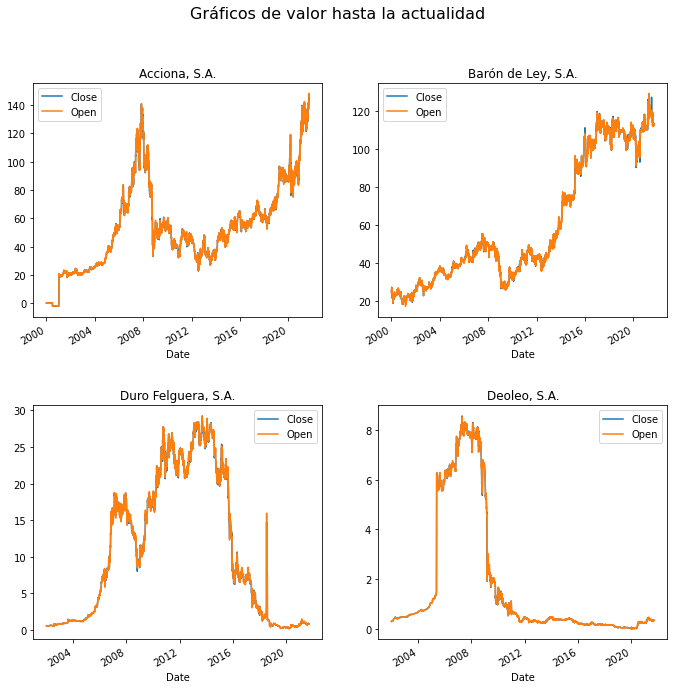

In [67]:
history = np.concatenate((maximos[:,-1],minimos[:,-1]), axis=0)
nombres = np.concatenate((maximos[:, 0], minimos[:, 0]), axis=0)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.suptitle('Gráficos de valor hasta la actualidad', fontsize=16)
for i in range(4):
    axe = plt.subplot(2,2,i+1)
    axe.set_title(df['Nombre'][i])
    data = history[i](period='max')  #pandas
    data.plot(kind='line', y="Close", ax=axe) #imprime en grafico de lineas, datos de cierre/ ax lugar dónde imprimir
    data.plot(kind='line', y="Open", ax=axe) #imprime en gráfico de líneas, datos de apertura
fig.tight_layout(pad=3.0)

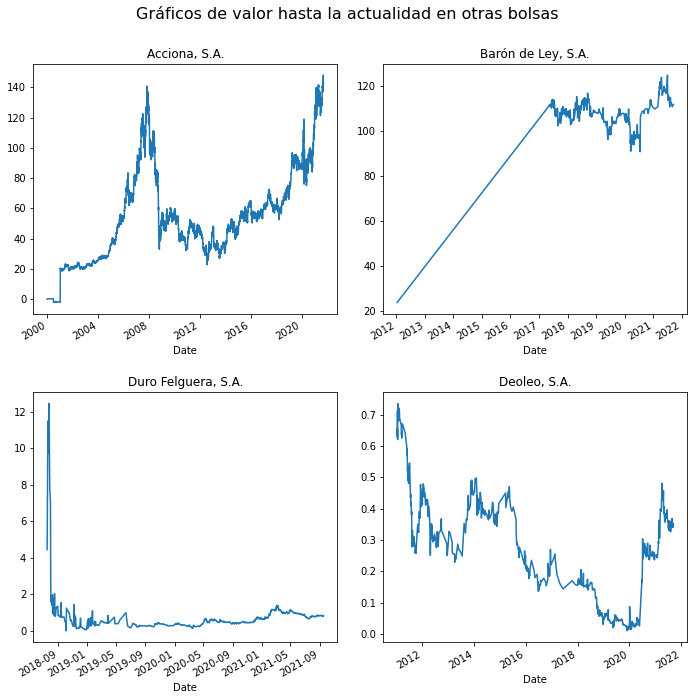

In [68]:
ana_mc = yf.Ticker('ANA.MC')
anamc_df = ana_mc.history(period="max")

leyf = yf.Ticker('LEY.F')
leyf_df = leyf.history(period="max")


df5bf = yf.Ticker('DF5B.F')
df5bf_df = df5bf.history(period="max")

sc5af = yf.Ticker('SC5A.F')
sc5af_df = sc5af.history(period="max")

data_frames = [anamc_df, leyf_df, df5bf_df, sc5af_df]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Gráficos de valor hasta la actualidad en otras bolsas', fontsize=16)
for i in range(len(data_frames)):
    axe = plt.subplot(2, 2, i+1)
    axe.set_title(df['Nombre'][i])
    data_frames[i]['Close'].plot(kind='line', ax=axe)
fig.tight_layout(pad=2.0)